In [1]:
%pylab inline
import sys; sys.path.insert(0, "../")
import numpy as np
import time

import pandas
import seaborn as sns

from emcee.autocorr import *
from ensemble_sampler import *

Populating the interactive namespace from numpy and matplotlib


### Example of sampling from a multivariate gaussian

In [2]:
dim = 2
nwalkers = 4
niters = 100000

In [3]:
mu = np.random.randn(dim)

cov = 0.5 - np.random.rand(dim ** 2).reshape((dim, dim))
cov = np.triu(cov)
cov += cov.T - np.diag(cov.diagonal())
cov = np.dot(cov,cov)

t_dist = MultivariateGaussian(cov=cov, mu=mu, dim=dim)


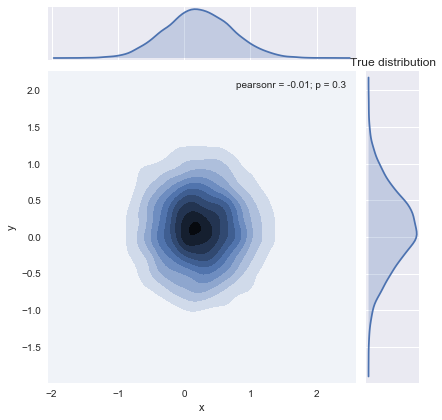

In [4]:
data = np.empty([10000, 2])
for i in range(10000):
    data[i] = np.random.multivariate_normal(mean=mu, cov=cov)
df = pandas.DataFrame(data, columns=['x', 'y'])
sns.jointplot(x='x', y='y', data=df, kind='kde')
sns.plt.title('True distribution')

##### Only ensemble, proposal scale=0.5. 

In [5]:
save_dir = './data/'
title = 'ensemble_only'

In [6]:
proposal = PCNWalkMove(s=3, scale=0.5)
sampler = Sampler(dim=dim, t_dist=t_dist, proposal=proposal, nwalkers=nwalkers)

start = time.time()
sampler.run_mcmc(niters, batch_size=1, p0=np.random.randn(dim*nwalkers).reshape([nwalkers, dim]), 
                verbose=True, print_every=5000, store=True, save_dir=save_dir, title=title)
hist = sampler.history
end = time.time()

====iter 0====
Acceptance probability: [  2.37200337e-06]
Accepted: [False]
====iter 5000====
Acceptance probability: [ 0.00302152]
Accepted: [False]
====iter 10000====
Acceptance probability: [ 0.90934099]
Accepted: [ True]
====iter 15000====
Acceptance probability: [ 0.62719509]
Accepted: [False]
====iter 20000====
Acceptance probability: [ 1.20671042]
Accepted: [ True]
====iter 25000====
Acceptance probability: [ 1.29616575]
Accepted: [ True]
====iter 30000====
Acceptance probability: [ 0.24822381]
Accepted: [False]
====iter 35000====
Acceptance probability: [ 1.07436941]
Accepted: [ True]
====iter 40000====
Acceptance probability: [ 0.44839762]
Accepted: [False]
====iter 45000====
Acceptance probability: [ 0.90222176]
Accepted: [ True]
====iter 50000====
Acceptance probability: [ 1.55689356]
Accepted: [ True]
====iter 55000====
Acceptance probability: [ 0.46138263]
Accepted: [ True]
====iter 60000====
Acceptance probability: [ 0.28347185]
Accepted: [ True]
====iter 65000====
Accept

In [7]:
print 'finishes in about %.2f seconds' % float(end - start)
try:
    print 'auto-correlation time: %s' % sampler.auto_corr()
except AutocorrError, err:
    print err

finishes in about 43.49 seconds
auto-correlation time: [ 30.53910674  30.7113341 ]


In [8]:
print sampler.acceptance / niters

[ 0.70972  0.71049  0.70748  0.71051]


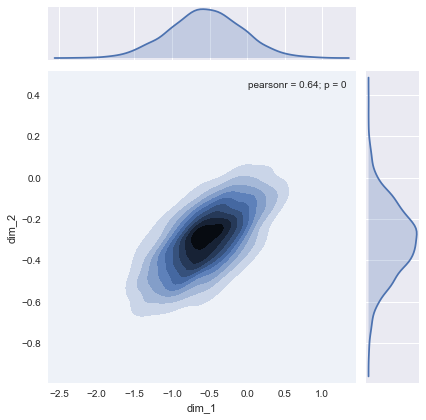

In [9]:
chain = hist.get_flat('chain')
x, y = ['dim_1', 'dim_2']
df = DataFrame(np.vstack([chain[::100, 0], chain[::100, 1]]).T, columns=[x, y])
sns.jointplot(x=x, y=y, data=df, kind='kde')

In [11]:
np.cov(chain.T) - cov

array([[  1.26919935e-03,   4.27464025e-04],
       [  4.27464025e-04,  -2.07266551e-05]])

##### pCN, proposal beta=0.4. 

In [ ]:
nwalkers = 100
niter = 100000

# p0 = sampler.history.curr_pos
proposal = PCNWalkMove(s=3, beta=0.4)
sampler = Sampler(dim=dim, t_dist=t_dist, proposal=proposal, nwalkers=nwalkers)

p0 = np.random.randn(dim*nwalkers).reshape([nwalkers, dim])
# p0 = np.random.multivariate_normal(mean=mu, cov=cov, size=nwalkers)

start = time.time()
sampler.run_mcmc(niter, batch_size=50, p0=p0,
                 store=True, verbose=False, print_every=5000)
hist = sampler.history
end = time.time()
print 'finishes in about %.2f seconds' % float(end - start)
try:
    print 'auto-correlation time: %s' % sampler.auto_corr()
except AutocorrError, err:
    print err

In [ ]:
chain = hist.get_flat('chain')
x, y = ['dim_1', 'dim_2']
df = DataFrame(np.vstack([chain[::100, 0], chain[::100, 1]]).T, columns=[x, y])
sns.jointplot(x=x, y=y, data=df, kind='kde')

#### "Pure pCN"

In [7]:
dim = 2
nwalkers = 4
niters = 100000

proposal = PCNWalkMove(s=None, beta=0.3)
sampler = Sampler(dim=dim, t_dist=t_dist, proposal=proposal, nwalkers=nwalkers)
"""# first run 100 steps and use the location as p0
sampler.run_mcmc(100, batch_size=1, p0=np.random.randn(dim*nwalkers).reshape([nwalkers, dim]))
p0 = sampler.history.curr_pos

sampler.init()
sampler.proposal.s = 3
sampler.proposal.beta = 0.05"""

start = time.time()
sampler.run_mcmc(niters, batch_size=1, p0=np.random.randn(dim*nwalkers).reshape([nwalkers, dim]),
                 store=True, verbose=True, print_every=5000)
hist = sampler.history
end = time.time()
print 'finishes in about %.2f seconds' % float(end - start)
try:
    print 'auto-correlation time: %s' % sampler.auto_corr()
except AutocorrError, err:
    print err

====iter 0====
Acceptance probability: [  5.37201200e+12]
Accepted: [ True]
====iter 5000====
Acceptance probability: [  1.03502996e-09]
Accepted: [False]
====iter 10000====
Acceptance probability: [ 0.00630287]
Accepted: [False]
====iter 15000====
Acceptance probability: [ 0.68777318]
Accepted: [False]
====iter 20000====
Acceptance probability: [  3.43511133e-10]
Accepted: [False]
====iter 25000====
Acceptance probability: [ 9.48189871]
Accepted: [ True]
====iter 30000====
Acceptance probability: [ 1.10657412]
Accepted: [ True]
====iter 35000====
Acceptance probability: [ 1.61510236]
Accepted: [ True]
====iter 40000====
Acceptance probability: [ 0.00176739]
Accepted: [False]
====iter 45000====
Acceptance probability: [  7.12792934e-07]
Accepted: [False]
====iter 50000====
Acceptance probability: [ 0.36276534]
Accepted: [False]
====iter 55000====
Acceptance probability: [ 0.01566687]
Accepted: [False]
====iter 60000====
Acceptance probability: [ 0.68230805]
Accepted: [ True]
====iter 6

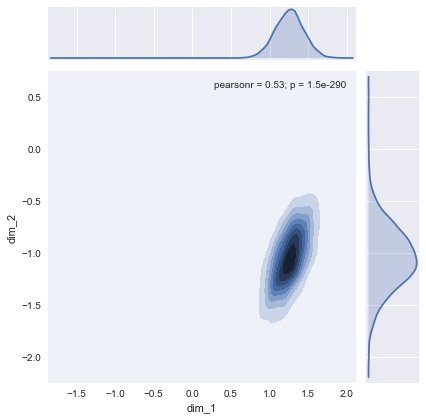

In [8]:
chain = hist.get_flat('chain')
x, y = ['dim_1', 'dim_2']
df = DataFrame(np.vstack([chain[::100, 0], chain[::100, 1]]).T, columns=[x, y])
sns.jointplot(x=x, y=y, data=df, kind='kde')

In [22]:
(np.cov(chain.T) - cov) / cov

array([[ 0.00641237, -0.02396559],
       [-0.02396559, -0.01272465]])

array([[ 0.03620762,  0.03586347],
       [ 0.03586347,  0.09442239]])